In [1]:
!ls data

discoveries.csv                  discovery_counts
discoveries_ordered.csv          discovery_counts_by_facility.csv
discoveries_overtime.csv         distinct_planets_ps_table.csv
discoveries_overtime_exp.csv


In [2]:
!head data/distinct_planets_ps_table.csv


pl_name,pl_masse,ra,dec
"HAT-P-1 b",169.08556,344.4453632,38.6749190
"47 UMa d",,164.8647611,40.4304931
"HIP 5158 b",,16.5094891,-22.4536134
"HD 134987 b",,228.3675397,-25.3096721
"HD 171238 b",,278.6818389,-28.0727849
"Kepler-32 b",1303.00000,297.8423073,46.5743595
"Kepler-136 b",,296.4673039,42.5987984
"HD 5608 b",,14.5594349,33.9505774
"HAT-P-1 b",166.54292,344.4453632,38.6749190


In [3]:
!head data/discoveries_overtime_exp.csv

pl_name,discoverymethod,sy_snum,sy_pnum,sy_mnum,glat,glon,pl_orbper,pl_rade,disc_year
"HD 114762 b","Radial Velocity",2,1,0,79.24789,330.64674,83.91510000,12.440,1989
"PSR B1257+12 c","Pulsar Timing",1,3,0,75.41367,311.30973,66.54190000,1.910,1992
"PSR B1257+12 d","Pulsar Timing",1,3,0,75.41367,311.30973,98.21140000,1.800,1992
"PSR B1257+12 b","Pulsar Timing",1,3,0,75.41367,311.30973,25.26200000,0.338,1994
"51 Peg b","Radial Velocity",1,1,0,-34.72750,90.06374,4.23078500,14.300,1995
"16 Cyg B b","Radial Velocity",3,1,0,13.20446,83.33558,798.50000000,13.500,1996
"70 Vir b","Radial Velocity",1,1,0,74.09910,337.65749,116.68800000,12.600,1996
"47 UMa b","Radial Velocity",1,3,0,63.36770,175.78305,1078.00000000,13.200,1996
"55 Cnc b","Radial Velocity",2,5,0,37.69663,196.79526,14.65160000,13.900,1996


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
plt.style.use('ggplot')

In [5]:
planet_data = pd.read_csv('data/discoveries_overtime_exp.csv')
planet_data.describe()

,sy_snum,sy_pnum,sy_mnum,glat,glon,pl_orbper,pl_rade,disc_year
count,4401.000000,4401.000000,4401.0,4401.000000,4401.000000,4.258000e+03,4387.000000,4401.000000
mean,1.112702,1.785276,0.0,6.609721,127.960978,3.925921e+03,5.695589,2014.653488
std,0.356147,1.171643,0.0,28.121658,92.566966,1.664259e+05,5.399877,3.877692
min,1.000000,1.000000,0.0,-88.324780,0.039250,9.070629e-02,0.296000,1989.000000
25%,1.000000,1.000000,0.0,2.259890,73.900760,4.463672e+00,1.750000,2014.000000
50%,1.000000,1.000000,0.0,12.115680,79.007860,1.181235e+01,2.730000,2016.000000
75%,1.000000,2.000000,0.0,17.168900,187.392500,4.180833e+01,11.960000,2016.000000
max,4.000000,8.000000,0.0,86.470460,359.996270,8.040000e+06,77.342000,2021.000000


In [6]:
planet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4401 non-null   object 
 1   discoverymethod  4401 non-null   object 
 2   sy_snum          4401 non-null   int64  
 3   sy_pnum          4401 non-null   int64  
 4   sy_mnum          4401 non-null   int64  
 5   glat             4401 non-null   float64
 6   glon             4401 non-null   float64
 7   pl_orbper        4258 non-null   float64
 8   pl_rade          4387 non-null   float64
 9   disc_year        4401 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 344.0+ KB


NOTE:  Nulls in orbital period and planet radius columns

In [7]:
planet_data[planet_data['sy_mnum'] > 0]  #List any rows with non-zero values in 'sy_mnum'

,pl_name,discoverymethod,sy_snum,sy_pnum,sy_mnum,glat,glon,pl_orbper,pl_rade,disc_year


NOTE:  sy_num column has no non-zero values...

In [9]:
disc_methods = planet_data['discoverymethod'].value_counts()
disc_methods

Transit                          3336
Radial Velocity                   850
Microlensing                      108
Imaging                            53
Transit Timing Variations          21
Eclipse Timing Variations          16
Pulsar Timing                       7
Orbital Brightness Modulation       6
Pulsation Timing Variations         2
Astrometry                          1
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

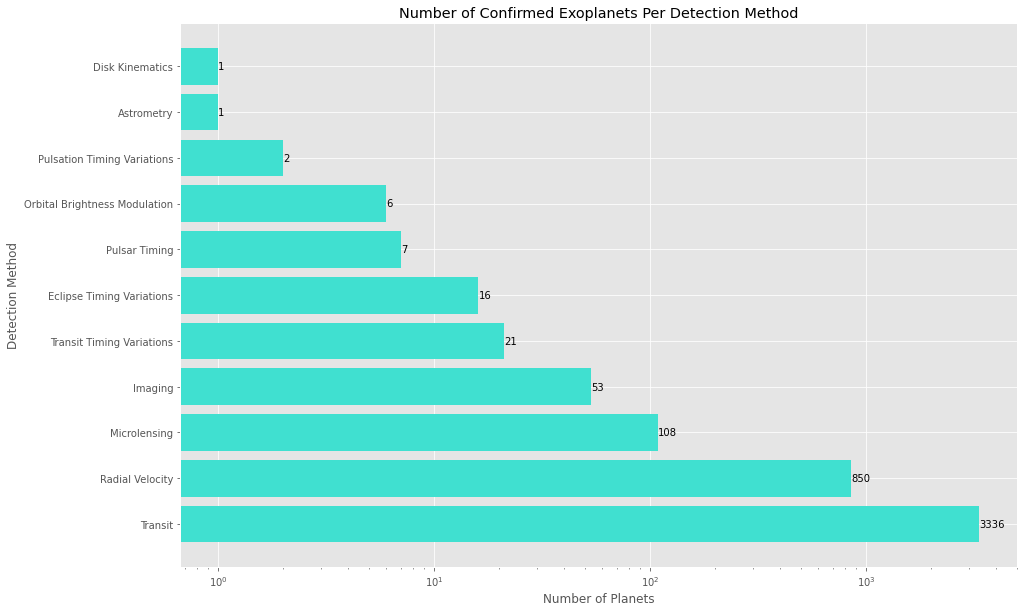

In [50]:
# Create a bar plot of exoplanet detections by discovery method
fig,ax = plt.subplots(figsize = (15,10))
bars = ax.barh(disc_methods.index, disc_methods.values, color = 'turquoise')
ax.set_title('Number of Confirmed Exoplanets Per Detection Method')
ax.set_xlabel('Number of Planets')
ax.set_ylabel('Detection Method')
ax.set_xscale('log')

# Add labels for each bar
for bar in bars:
  width = bar.get_width()
  label_y_pos = bar.get_y() + bar.get_height() / 2
  ax.text(width, label_y_pos, s=f'{width}', va='center')

In [17]:
disc_years = planet_data['disc_year'].value_counts()
disc_years.sort_index()

1989       1
1992       2
1994       1
1995       1
1996       6
1997       1
1998       6
1999      13
2000      16
2001      12
2002      29
2003      22
2004      27
2005      36
2006      31
2007      52
2008      66
2009      95
2010      97
2011     138
2012     139
2013     125
2014     871
2015     157
2016    1505
2017     153
2018     314
2019     199
2020     227
2021      59
Name: disc_year, dtype: int64

Text(0, 0.5, 'Number of Planets')

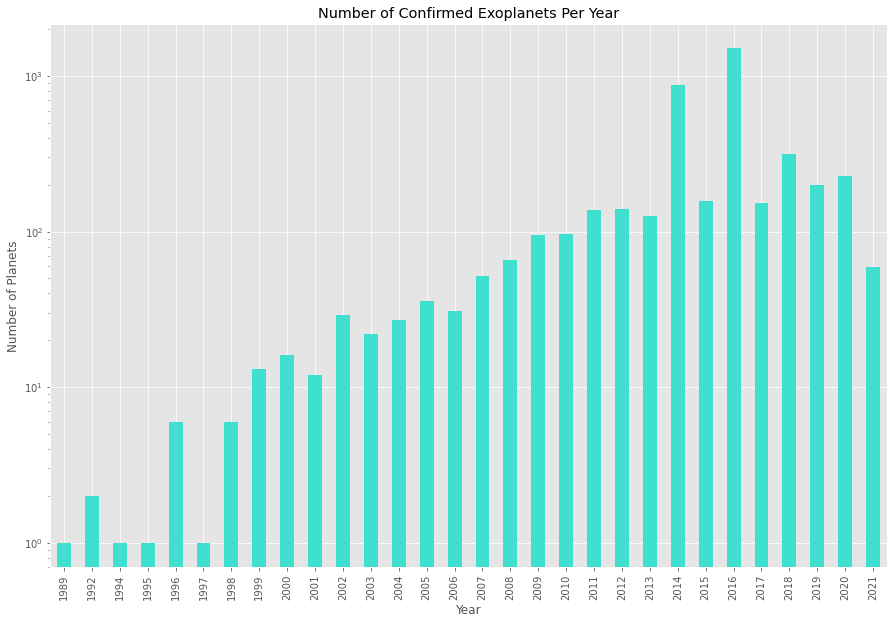

In [73]:
ax_yrs = disc_years.sort_index().plot.bar(logy = True, figsize = (15,10), color = 'turquoise')
ax_yrs.set_title('Number of Confirmed Exoplanets Per Year')
ax_yrs.set_xlabel('Year')
ax_yrs.set_ylabel('Number of Planets')
#disc_years.sort_index().plot(ax=ax_yrs, color='blue')

Text(0, 0.5, 'Number of Planets')

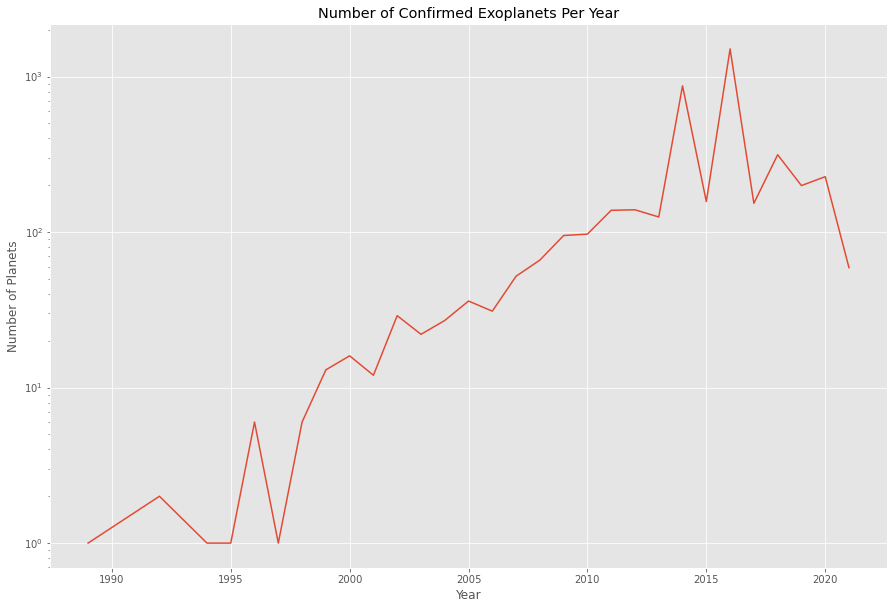

In [35]:
ax_yrs_2 = disc_years.sort_index().plot(logy = True, figsize = (15,10))
ax_yrs_2.set_title('Number of Confirmed Exoplanets Per Year')
ax_yrs_2.set_xlabel('Year')
ax_yrs_2.set_ylabel('Number of Planets')

Text(0, 0.5, 'Number of Planets')

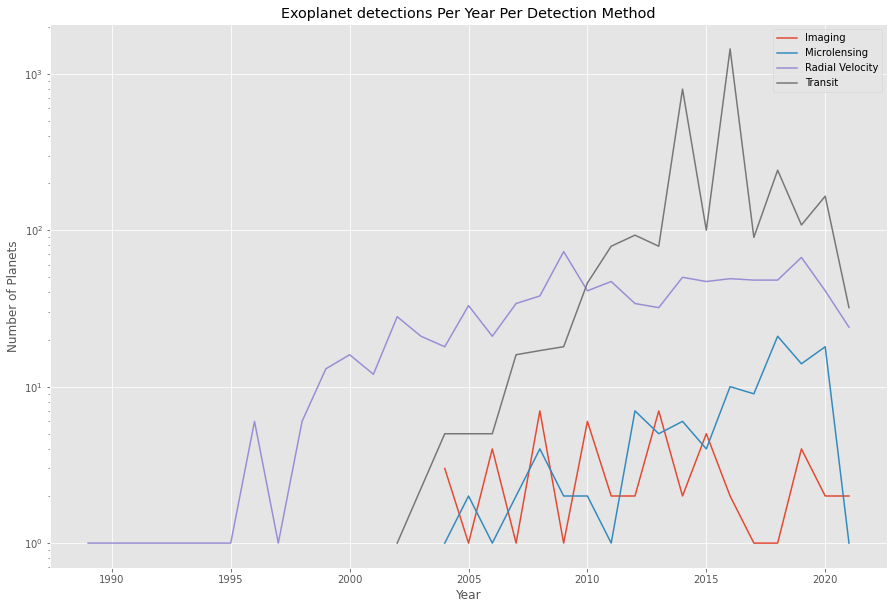

In [72]:
# Line plot per detection method
top_methods = disc_methods[disc_methods > 50].index
# Throw out methods with less than 50 detections to de-clutter plot
reduced_planet_data = planet_data[planet_data['discoverymethod'].isin(top_methods)]
# Plot number of detects over time for top methods
fig2, ax2 = plt.subplots(figsize=(15,10))
for name, method in reduced_planet_data.groupby('discoverymethod')['disc_year']:
    x = method.value_counts().sort_index().index
    y = method.value_counts().sort_index().values
    ax2.plot(x, y, label = f"{name}")

ax2.set_yscale('log')
ax2.legend(loc='best')

ax2.set_title('Exoplanet detections Per Year Per Detection Method')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Planets')
# Need to add zeros for appropriate years

# Change to cumulative line plot?

In [ ]:
# Grouped/stacked bar chart for space vs. ground - based detection

In [ ]:
# Faceting for planet characteristics...over time?

In [ ]:
# Grouped bar chart of detections by detection method over 5-10 yr intervals

In [ ]:
# Plot lat, long, size scaled to planet radius

In [ ]:
# Box plots of planet characteristics